In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import os

In [2]:
images = os.listdir('dataset/')

In [3]:
len(images)

129

In [4]:
face_cascade = cv2.CascadeClassifier('cascade.xml')

In [5]:
face_data = []

In [6]:
for imgPath in images:
    img = cv2.imread('dataset/'+imgPath,cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray,1.3)
    for x,y,w,h in face:
        face_comp = gray[y:y+h, x:x+w]
        face_comp = cv2.resize(face_comp, (50,50))
    face_data.append(face_comp)

In [7]:
face_data = np.asarray(face_data)

In [8]:
face_data.shape

(129, 50, 50)

In [9]:
import matplotlib.pyplot as plt

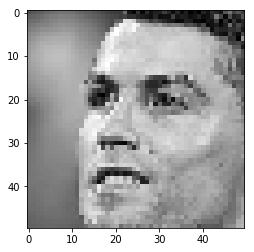

In [10]:
plt.imshow(face_data[0])
plt.gray()

In [11]:
face_data = np.reshape(face_data, (face_data.shape[0],-1))

In [12]:
face_data.shape

(129, 2500)

In [13]:
face_data = face_data / 255.

In [14]:
from sklearn import metrics
from scipy.spatial.distance import cdist

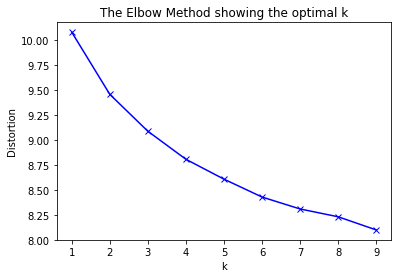

In [15]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(face_data)
    kmeanModel.fit(face_data)
    distortions.append(sum(np.min(cdist(face_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / face_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
clusters = KMeans(n_clusters=5,max_iter=5000)
clusters.fit(face_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = clusters.predict(face_data)

In [18]:
labels

array([0, 0, 0, 4, 1, 3, 3, 0, 0, 0, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 3, 4, 4, 0, 4, 3, 3, 4, 3, 3, 3, 4, 0, 4, 4, 0, 1, 3, 3, 4,
       3, 4, 1, 0, 0, 1, 3, 4, 0, 1, 2, 2, 1, 1, 1, 3, 3, 0, 0, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 4, 3, 3, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 4, 3, 0,
       1, 1, 3, 3, 2, 1, 1, 2, 0, 2, 2, 3, 4, 1, 4, 1, 4, 4, 0, 3, 3, 0,
       4, 0, 1, 0, 0, 0, 0, 3, 4, 0, 3, 4, 4, 4, 3, 0, 4, 4, 0])

In [19]:
face_data[0]

array([0.31764706, 0.34901961, 0.36862745, ..., 0.55686275, 0.68235294,
       0.70196078])

In [20]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([28, 28,  8, 41, 24], dtype=int64))

In [21]:
predictions = {}
for i in range(5):
    predictions[i] = []

for i in range(len(face_data)):
    predictions[labels[i]].append(images[i])

In [22]:
predictions[4]

['00000003.jpg',
 '00000025.jpg',
 '00000026.jpg',
 '00000028.jpg',
 '00000031.jpg',
 '00000035.jpg',
 '00000037.jpg',
 '00000038.jpg',
 '00000043.jpg',
 '00000045.jpg',
 '00000051.jpg',
 '00000072.jpg',
 '00000085.jpg',
 '00000100.jpg',
 '00000102.jpg',
 '00000104.jpg',
 '00000105.jpg',
 '00000110.jpg',
 '00000118.jpg',
 '00000121.jpg',
 '00000122.jpg',
 '00000123.jpg',
 '00000126.jpg',
 '00000127.jpg']

In [23]:
for i in range(5):
    os.mkdir(str(i))

In [24]:
for key in predictions:
    for img in predictions[key]:
        data = open('dataset/'+img,'rb').read()
        open(str(key)+'/'+img,'wb').write(data)

In [25]:
clusters.cluster_centers_.shape

(5, 2500)

In [32]:
import pickle as pkl

In [35]:
with open('cluster.pkl','wb') as file:
    pkl.dump(clusters,file)